https://tracker.zooplus.de/browse/LCUSS-398

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
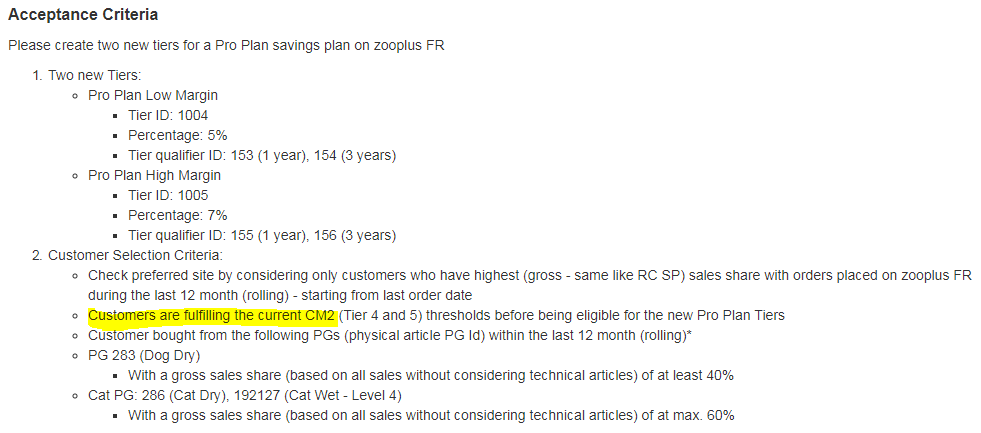

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
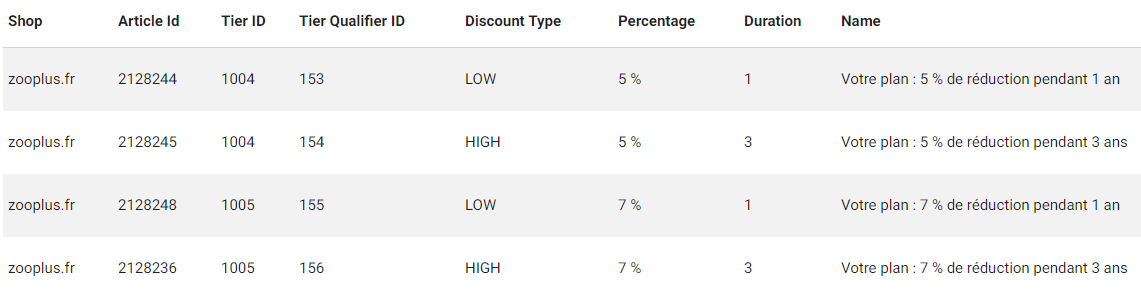

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
from IPython.display import display
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('fr_proplan_sp.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269049 entries, 0 to 269048
Data columns (total 38 columns):
SCM_N_ORDER_POS_NR              269049 non-null int64
SCM_N_ORDER_NR                  269049 non-null int64
TDT_T_KEY_ORDER_DATE            269049 non-null object
THR_C_KEY_ORDER_HOUR            269049 non-null object
SIT_N_KEY_SITE                  269049 non-null int64
CUS_N_KEY_CUSTOMER              269049 non-null int64
SCM_SALES_BMF                   269049 non-null object
SCM_SALES_CANCEL_BMF            269049 non-null object
SCM_D_FINANCE_CM1               269049 non-null object
SCM_D_FINANCE_CM2               269049 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    269049 non-null object
SCM_AP_ID                       269049 non-null int64
SCM_AS_ID                       269049 non-null int64
SCM_MASTER_AP_ID                269049 non-null int64
SCM_IS_ZSP_ORDER                269049 non-null int64
SCM_C_ORDER_STATUS              269049 non-null object
CTP_N_KEY_CUSTOME

In [4]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP
0,470680474,110539330,13/05/18,09:59,4,7944492,"49,99",0,"9,5883","2,8915",...,06/11/18,153,5,"2,99",110539330,7944492,7944492,2128529,0,NaN
1,470680476,110539330,13/05/18,09:59,4,7944492,"-4,67",0,"-3,8917","-3,8917",...,06/11/18,153,5,"2,99",110539330,7944492,7944492,6,0,NaN
2,470680475,110539330,13/05/18,09:59,4,7944492,"43,47",0,"10,095","7,0808",...,06/11/18,153,5,"2,99",110539330,7944492,7944492,473127,0,NaN
3,433906466,101710947,03/01/18,11:02,4,5473582,"7,49",0,"1,3317","0,8731",...,06/11/18,153,5,"2,99",101710947,5473582,5473582,1530077,0,NaN
4,433906468,101710947,03/01/18,11:02,4,5473582,"85,99",0,"15,0983","6,9129",...,06/11/18,153,5,"2,99",101710947,5473582,5473582,1133422,0,NaN


In [5]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [6]:
data['ORDER_DATETIME'] = data['TDT_T_KEY_ORDER_DATE'].astype(str) + ' ' + data['THR_C_KEY_ORDER_HOUR'].astype(str) + ':00'

In [7]:
data.head()[data.columns[25:]]

,OSP_4_LEAD_P_PG_ID,OSP_4_LEAD_P_PG_SHARE,CZP_START_DATE,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP,ORDER_DATETIME
0,283,"0,5349",06/11/17,06/11/18,153,5,"2,99",110539330,7944492,7944492,2128529,0,NaN,2018-05-13 09:59:00
1,283,"0,5349",06/11/17,06/11/18,153,5,"2,99",110539330,7944492,7944492,6,0,NaN,2018-05-13 09:59:00
2,283,"0,5349",06/11/17,06/11/18,153,5,"2,99",110539330,7944492,7944492,473127,0,NaN,2018-05-13 09:59:00
3,283,"0,8001",06/11/17,06/11/18,153,5,"2,99",101710947,5473582,5473582,1530077,0,NaN,2018-01-03 11:02:00
4,283,"0,8001",06/11/17,06/11/18,153,5,"2,99",101710947,5473582,5473582,1133422,0,NaN,2018-01-03 11:02:00


In [8]:
data['ORDER_DATETIME'] = pd.to_datetime(data['ORDER_DATETIME'], 
                                      format="%Y/%m/%d %H:%M:%S")

In [9]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [10]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [11]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [12]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [13]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [14]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [15]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [16]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [17]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(269049, 51686)

In [18]:
#CHECK DUPLICATED ROWS

In [19]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [20]:
len(dupl_mask), sum(dupl_mask)

(51686, 131)

In [21]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [22]:
dup_orders

array([106386516, 106395918, 106404339, 106510625, 106705838, 106713170,
       106761751, 106764982, 106912770, 106955960, 106989168, 107096624,
       107231144, 107280587, 107282541, 107298155, 107375727, 107380549,
       107430958, 107438058, 107512636, 107559081, 107604040, 107628251,
       107685647, 107694194, 107781915, 107784937, 107795749, 107797182,
       107799279, 107799940, 107819757, 107843111, 107857065, 107975099,
       107992027, 108022472, 108022696, 108024734, 108036176, 108046693,
       108076871, 108084185, 108106952, 108109809, 108112378, 108151599,
       108165819, 108216273, 108241431, 108549859, 108561912, 108577097,
       108602923, 108629129, 108637362, 108692833, 108725897, 108747848,
       108805134, 108820759, 108836389, 108860157, 108895677, 108950232,
       109064407, 109116863, 109117195, 109126863, 109144040, 109180299,
       109190177, 109205724, 109251446, 109265747, 109281559, 109283621,
       109310151, 109317992, 109354188, 109360760, 

In [23]:
len(dup_orders)

131

In [24]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

1612

In [25]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [26]:
cust_2_dup_orders

array([], dtype=int64)

In [27]:
data[(data['CUS_N_KEY_CUSTOMER'].isin(cust_2_dup_orders)) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]['SCM_N_ORDER_NR'].unique()

array([], dtype=int64)

In [28]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [29]:
len(dup_indexes)

131

In [30]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something went wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [31]:
len(dup_indexes)

131

In [32]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [33]:
len(dupl_ind)

806

In [34]:
exclude_data = data.index.isin(dupl_ind)

In [35]:
len(data)

269049

In [36]:
data = data[~exclude_data]

In [37]:
len(data)

268243

In [38]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [39]:
# When duplicated
#data[data['SCM_N_ORDER_NR'] == 109117195][data.columns[25:]]

In [40]:
# We need to calculate Net Sales another time because in duplicated orders net sales has been x2 and Relatives CM1% and CM2% 
# are not good

In [41]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [42]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [43]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [44]:
data[data['SCM_N_ORDER_NR'] == 109117195][data.columns[25:]]

,OSP_4_LEAD_P_PG_ID,OSP_4_LEAD_P_PG_SHARE,CZP_START_DATE,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2
27060,682,"0,7744",2018-04-20,2019-04-20,153,5,2.99,109117195,8110452,8110452,6,0,B,2018-04-20 21:01:00,16,4,49.0584,-5.265765,-5.265765
27061,682,"0,7744",2018-04-20,2019-04-20,153,5,2.99,109117195,8110452,8110452,688133,0,B,2018-04-20 21:01:00,16,4,49.0584,18.573170,5.595576
27062,682,"0,7744",2018-04-20,2019-04-20,153,5,2.99,109117195,8110452,8110452,1151020,550,B,2018-04-20 21:01:00,16,4,49.0584,-7.297425,-8.358405
27063,682,"0,7744",2018-04-20,2019-04-20,153,5,2.99,109117195,8110452,8110452,2128244,0,B,2018-04-20 21:01:00,16,4,49.0584,5.079049,5.079049
27064,682,"0,7744",2018-04-20,2019-04-20,153,5,2.99,109117195,8110452,8110452,2145693,0,B,2018-04-20 21:01:00,16,4,49.0584,10.005014,2.878406


In [45]:
ztq = [153, 154, 155, 156]

In [46]:
metrics_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 'CM2', 'CM1%', 'CM2%',
                                   'discount_amount', 'orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 'loss_in_CM2'])
for tq in ztq:
    df_elems = []
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    #print('*** Tier ', tq, '***')
    df_elems.append(tq)
    #print('Active customers in selected period: ', data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    df_elems.append(data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    #print('Total orders placed: ', data_tier['SCM_N_ORDER_NR'].nunique())
    df_elems.append(data_tier['SCM_N_ORDER_NR'].nunique())
    #print('Total sales BMF: ', (data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    #print('Total net sales: ', data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum())
    df_elems.append(data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    #print('Total CM1: ', data_tier['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum())
    #print('Total CM2: ', data_tier['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum())
    #print('Total CM1%: ', data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('Total CM2%: ', data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('-----')
    #print('Total discount given by ZP: ', (data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
    #                                        data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
                                            data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    #print('-----')
    cm1_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    #print('Total orders with negative CM1: ', len(orders_neg_cm1))
    #print('% Orders with negative CM1: ', len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM1: ', cm1_per_order[cm1_per_order <= 0].sum())
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    orders_only_neg_cm2 = data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
    orders_only_neg_cm2.sum()
    
    #print('Total orders with negative CM2: ', len(orders_neg_cm2))
    #print('% Orders with negative CM2: ', len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM2: ', cm2_per_order[cm2_per_order <= 0].sum())
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    
    #print('....................................................................................................................')
    #print('....................................................................................................................')
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_ztq.columns)
    metrics_ztq = metrics_ztq.append(new_row, ignore_index=True)

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

In [47]:
metrics_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,153,5893,26585,2062002.11,1732096.29,437916.31,150687.60,25.28,8.70,-108436.52,0.34,-246.52,20.30,-13527.26
1,154,2686,11756,1040487.41,874186.43,213868.02,75137.68,24.46,8.60,-54829.84,0.48,-447.58,20.35,-7425.57
2,155,2022,8515,707344.90,594279.16,142790.91,44182.24,24.03,7.43,-53192.33,0.42,-112.11,28.57,-6460.18
3,156,1116,4830,479273.95,403204.92,89185.67,26040.20,22.12,6.46,-36048.41,0.99,-255.67,28.92,-5214.56


+ Insights:
    - More than 20% of negative orders in CM2 for the Low Tier (153, 154) and almost 30% for the High one (155, 156)
    - Loss in CM2 represent between 15-20% from the total CM2 obtained in the case of tiers 155 & 156 (7% discount, 1-3 yo)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268243 entries, 0 to 269048
Data columns (total 44 columns):
SCM_N_ORDER_POS_NR              268243 non-null int64
SCM_N_ORDER_NR                  268243 non-null int64
TDT_T_KEY_ORDER_DATE            268243 non-null datetime64[ns]
THR_C_KEY_ORDER_HOUR            268243 non-null object
SIT_N_KEY_SITE                  268243 non-null int64
CUS_N_KEY_CUSTOMER              268243 non-null int64
SCM_SALES_BMF                   268243 non-null float64
SCM_SALES_CANCEL_BMF            268243 non-null float64
SCM_D_FINANCE_CM1               268243 non-null float64
SCM_D_FINANCE_CM2               268243 non-null float64
SCM_D_ORIG_FINANCE_ORDER_NET    268243 non-null float64
SCM_AP_ID                       268243 non-null int64
SCM_AS_ID                       268243 non-null int64
SCM_MASTER_AP_ID                268243 non-null int64
SCM_IS_ZSP_ORDER                268243 non-null int64
SCM_C_ORDER_STATUS              268243 non-null object
CTP_

In [49]:
sp_customers = pd.DataFrame(columns=['CUSTOMER_ID', 'TIER', 'ORDERS', 'SALES', 'NET_SALES', 'BASKET_AVG', 'CM1', 'CM1_AVG',
                                    'CM1%', '%_NEG_CM1_ORD', 'LOSS_IN_CM1', 'CM2', 'CM2_AVG',
                                    'CM2%', '%_NEG_CM2_ORD', 'LOSS_IN_CM2', 'SP_SD', 'SP_ED', 'SP_DIFF', 'FIRST_O_DATE',
                                     'LAST_O_DATE', 'O_DIFF', 'PUR_FREQ_MON'])

for cus in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == cus]
    tier = cus_data['CZP_ZTQ_ID'].unique()
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    sales = cus_data['SCM_SALES_BMF'].sum() - cus_data['SCM_SALES_CANCEL_BMF'].sum() 
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    basket_avg = sales / orders
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_avg = cm1 / orders
    cm1_perc = cm1 / net_sales * 100
    neg_cm1_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)
    perc_neg_cm1_orders = neg_cm1_orders / orders * 100
    total_loss_cm1 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_avg = cm2 / orders
    cm2_perc = cm2 / net_sales * 100
    neg_cm2_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)
    perc_neg_cm2_orders = neg_cm2_orders / orders * 100
    total_loss_cm2 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].sum()
    sp_start_date = cus_data['CZP_START_DATE'].min()
    sp_expiry_date = cus_data['CZP_EXPIRY_DATE'].max()
    sp_diff = sp_expiry_date - sp_start_date
    first_o_date = cus_data['TDT_T_KEY_ORDER_DATE'].dt.date.min()
    last_o_date = cus_data['TDT_T_KEY_ORDER_DATE'].dt.date.max()
    diff_date = (last_o_date - first_o_date)
    diff_date_months = diff_date.days / 30
    if diff_date_months == 0:
        pur_freq_mon = 0
    else:
        pur_freq_mon = orders / diff_date_months
    row_ = [cus, tier, orders, sales, net_sales, basket_avg, cm1, cm1_avg, cm1_perc, perc_neg_cm1_orders, total_loss_cm1,
            cm2, cm2_avg, cm2_perc, perc_neg_cm2_orders, total_loss_cm2, sp_start_date, sp_expiry_date, sp_diff.days, 
            first_o_date, last_o_date, diff_date.days, pur_freq_mon]
    row_ = pd.DataFrame([row_], columns=sp_customers.columns)
    sp_customers = pd.concat([sp_customers, row_], ignore_index=True)

In [50]:
sp_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11619 entries, 0 to 11618
Data columns (total 23 columns):
CUSTOMER_ID      11619 non-null object
TIER             11619 non-null object
ORDERS           11619 non-null object
SALES            11619 non-null float64
NET_SALES        11619 non-null float64
BASKET_AVG       11619 non-null float64
CM1              11619 non-null float64
CM1_AVG          11619 non-null float64
CM1%             11619 non-null float64
%_NEG_CM1_ORD    11619 non-null float64
LOSS_IN_CM1      11619 non-null float64
CM2              11619 non-null float64
CM2_AVG          11619 non-null float64
CM2%             11619 non-null float64
%_NEG_CM2_ORD    11619 non-null float64
LOSS_IN_CM2      11619 non-null float64
SP_SD            11619 non-null datetime64[ns]
SP_ED            11619 non-null datetime64[ns]
SP_DIFF          11619 non-null object
FIRST_O_DATE     11619 non-null object
LAST_O_DATE      11619 non-null object
O_DIFF           11619 non-null object
PUR_

In [51]:
sp_customers['ORDERS'] = sp_customers['ORDERS'].astype(int)
sp_customers['SP_DIFF'] = sp_customers['SP_DIFF'].astype(int)
sp_customers['O_DIFF'] = sp_customers['O_DIFF'].astype(int)

In [52]:
sp_customers['TIER'] = sp_customers['TIER'].astype(str)

In [53]:
sp_customers['TIER'][:5]

0    [153]
1    [153]
2    [153]
3    [153]
4    [153]
Name: TIER, dtype: object

In [54]:
sp_customers.groupby('TIER')['CUSTOMER_ID'].count()

TIER
[153 154]      72
[153]        5821
[154 155]       1
[154]        2613
[155 156]      25
[155]        1996
[156]        1091
Name: CUSTOMER_ID, dtype: int64

In [55]:
selected_tiers = [
 '[153]',
 '[154]',
 '[155]',
 '[156]'
]
selected_tiers

['[153]', '[154]', '[155]', '[156]']

In [56]:
sp_customers = sp_customers[sp_customers['TIER'].isin(selected_tiers)]

In [57]:
def get_number_from_string(i):
    changes = i.replace('[', '').replace(']', '')
    return int(changes)

In [58]:
sp_customers['TIER'] = sp_customers['TIER'].map(get_number_from_string)

In [59]:
sp_customers['FIRST_O_DATE'] = pd.to_datetime(sp_customers['FIRST_O_DATE'], format="%Y-%m-%d")
sp_customers['LAST_O_DATE'] = pd.to_datetime(sp_customers['LAST_O_DATE'], format="%Y-%m-%d")
sp_customers['PUR_FREQ_MON'] = sp_customers['PUR_FREQ_MON'].astype(float)

In [60]:
sp_customers.round(2).sample(10).round(2)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,...,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2,SP_SD,SP_ED,SP_DIFF,FIRST_O_DATE,LAST_O_DATE,O_DIFF,PUR_FREQ_MON
7410,8963306,154,13,531.87,443.22,40.91,80.86,6.22,18.24,0.0,...,-4.06,100.00,-17.99,2017-05-18,2020-05-18,1096,2017-06-09,2018-05-04,329,1.19
4754,10584341,153,7,640.02,533.35,91.43,100.90,14.41,18.92,0.0,...,4.37,28.57,-2.16,2017-06-08,2018-06-08,365,2017-07-07,2018-04-11,278,0.76
8386,6103093,154,5,430.85,359.04,86.17,67.22,13.44,18.72,0.0,...,4.56,20.00,-5.43,2017-11-19,2020-12-13,1120,2017-12-17,2018-05-23,157,0.96
2922,7205513,153,5,214.00,178.33,42.80,53.59,10.72,30.05,0.0,...,8.67,0.00,0.00,2017-08-02,2018-08-02,365,2017-11-02,2018-05-29,208,0.72
3983,9824596,153,5,425.74,354.78,85.15,30.42,6.08,8.58,20.0,...,-3.92,40.00,-17.00,2017-07-10,2018-07-10,365,2017-09-06,2018-03-30,205,0.73
10403,14156437,155,1,52.48,43.73,52.48,12.60,12.60,28.82,0.0,...,2.77,0.00,0.00,2017-12-10,2018-12-10,365,2018-03-11,2018-03-11,0,0.00
4757,1206592,153,8,790.58,658.82,98.82,267.91,33.49,40.66,0.0,...,21.59,0.00,0.00,2017-06-10,2018-06-10,365,2017-09-06,2018-05-01,237,1.01
4921,2545545,153,2,151.98,126.65,75.99,32.78,16.39,25.88,0.0,...,13.03,50.00,-0.01,2017-12-28,2018-12-28,365,2018-02-28,2018-05-01,62,0.97
9672,11247483,155,9,388.05,372.52,43.12,57.43,6.38,15.42,0.0,...,-5.21,77.78,-22.03,2017-04-30,2018-04-30,365,2017-06-01,2018-04-04,307,0.88
3926,13143575,153,4,199.43,166.19,49.86,38.92,9.73,23.42,0.0,...,5.26,50.00,-5.85,2017-04-14,2018-04-14,365,2017-06-03,2017-09-03,92,1.30


In [61]:
sp_customers[sp_customers['SP_DIFF'] < 330]['CUSTOMER_ID'].count()

178

In [62]:
sp_customers[sp_customers['PUR_FREQ_MON'] == 0]['CUSTOMER_ID'].count()

2633

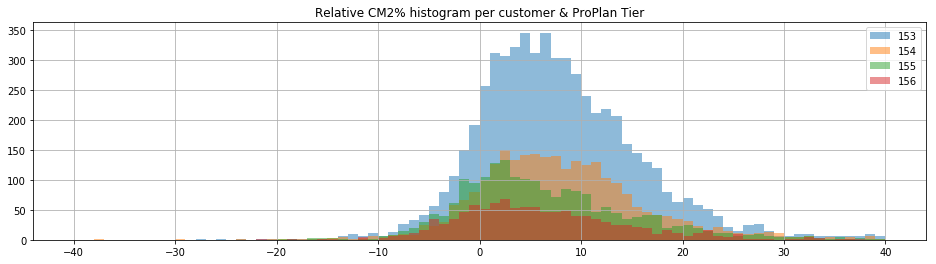

,Tier 153 CM2%,Tier 154 CM2%,Tier 155 CM2%,Tier 156 CM2%
count,5821.00,2613.00,1996.00,1091.00
mean,7.86,8.09,6.63,6.36
std,8.23,8.46,8.86,8.79
min,-95.53,-56.15,-19.60,-21.31
25%,2.42,2.66,0.70,0.42
50%,6.92,7.30,4.96,5.03
75%,12.37,12.45,10.99,10.99
max,52.01,51.42,49.92,53.38


In [63]:
concat_df = pd.DataFrame()

plt.figure(figsize=(16,4))
plt.title('Relative CM2% histogram per customer & ProPlan Tier')

for tq in ztq:
    data_tier = sp_customers[sp_customers['TIER'] == tq]
    data_tier['CM2%'].hist(bins=80, range=(-40, 40), alpha=0.5)
    plt.legend([153, 154, 155, 156])
    concat_df = pd.concat([concat_df,
                           pd.DataFrame(data_tier['CM2%'].describe().round(2)),
                           ], axis=1)
plt.show() 

concat_df.columns = ['Tier 153 CM2%', 'Tier 154 CM2%', 'Tier 155 CM2%', 'Tier 156 CM2%']
display(concat_df)

Half of customers from Tiers 155 & 156 have a CM2% under 5%

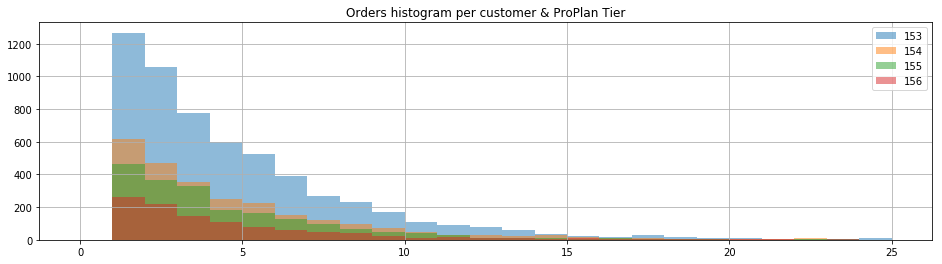

,Tier 153 Orders,Tier 154 Orders,Tier 155 Orders,Tier 156 Orders
count,5821.00,2613.00,1996.00,1091.00
mean,4.48,4.46,4.17,4.38
std,4.44,4.62,4.03,4.74
min,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,2.00
50%,3.00,3.00,3.00,3.00
75%,6.00,6.00,5.00,6.00
max,90.00,69.00,47.00,66.00


In [64]:
concat_df = pd.DataFrame()

plt.figure(figsize=(16,4))
plt.title('Orders histogram per customer & ProPlan Tier')

for tq in ztq:
    data_tier = sp_customers[sp_customers['TIER'] == tq]
    data_tier['ORDERS'].hist(bins=25, range=(0, 25), alpha=0.5)
    plt.legend([153, 154, 155, 156])
    concat_df = pd.concat([concat_df,
                           pd.DataFrame(data_tier['ORDERS'].describe().round(2)),
                           ], axis=1)
plt.show() 

concat_df.columns = ['Tier 153 Orders', 'Tier 154 Orders', 'Tier 155 Orders', 'Tier 156 Orders']
display(concat_df)

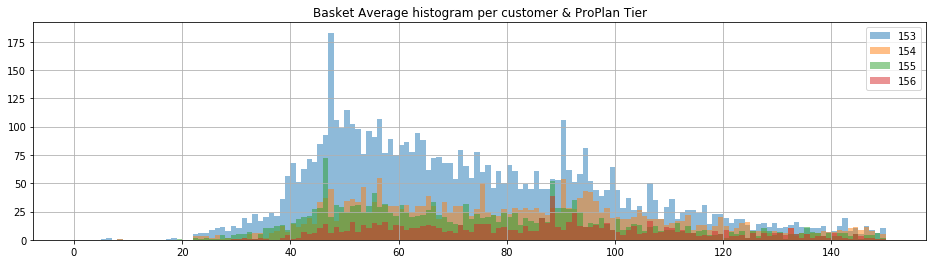

,Tier 153 BASKET_AVG,Tier 154 BASKET_AVG,Tier 155 BASKET_AVG,Tier 156 BASKET_AVG
count,5821.00,2613.00,1996.00,1091.00
mean,79.21,91.06,83.33,103.47
std,40.59,45.05,41.23,58.19
min,5.83,8.30,19.72,29.56
25%,52.24,59.87,54.53,66.08
50%,70.09,83.20,74.94,89.85
75%,94.97,107.28,97.85,119.08
max,721.92,636.96,378.56,644.40


In [65]:
concat_df = pd.DataFrame()

plt.figure(figsize=(16,4))
plt.title('Basket Average histogram per customer & ProPlan Tier')

for tq in ztq:
    data_tier = sp_customers[sp_customers['TIER'] == tq]
    data_tier['BASKET_AVG'].hist(bins=150, range=(0, 150), alpha=0.5)
    plt.legend([153, 154, 155, 156])
    concat_df = pd.concat([concat_df,
                           pd.DataFrame(data_tier['BASKET_AVG'].describe().round(2)),
                           ], axis=1)
plt.show() 

concat_df.columns = ['Tier 153 BASKET_AVG', 'Tier 154 BASKET_AVG', 'Tier 155 BASKET_AVG', 'Tier 156 BASKET_AVG']
display(concat_df) 

Really spreaded, morely between 50€ & 100€, long term plans have greater values, but remember the low CM2% for the High Tier.

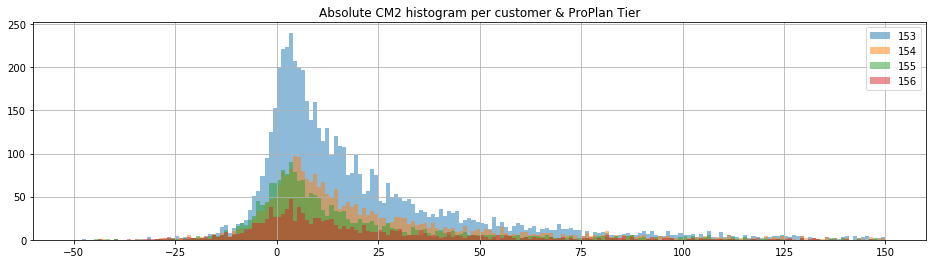

,Tier 153 CM2,Tier 154 CM2,Tier 155 CM2,Tier 156 CM2
count,5821.00,2613.00,1996.00,1091.00
mean,25.32,28.42,21.66,23.48
std,45.98,51.37,50.03,48.02
min,-47.26,-151.01,-63.70,-65.94
25%,3.21,4.23,1.01,0.79
50%,11.73,13.09,7.86,9.80
75%,30.22,33.33,23.15,28.95
max,1064.67,573.03,985.08,504.24


In [66]:
concat_df = pd.DataFrame()

plt.figure(figsize=(16,4))
plt.title('Absolute CM2 histogram per customer & ProPlan Tier')

for tq in ztq:
    data_tier = sp_customers[sp_customers['TIER'] == tq]
    data_tier['CM2'].hist(bins=200, range=(-50, 150), alpha=0.5)
    plt.legend([153, 154, 155, 156])
    concat_df = pd.concat([concat_df,
                           pd.DataFrame(data_tier['CM2'].describe().round(2)),
                           ], axis=1)
plt.show() 

concat_df.columns = ['Tier 153 CM2', 'Tier 154 CM2', 'Tier 155 CM2', 'Tier 156 CM2']
display(concat_df) 

Having said that not all customers have completed their 1 year period of SP performance, absolutes CM2 are anyway low reaching more than 30€ per year in a few cases.

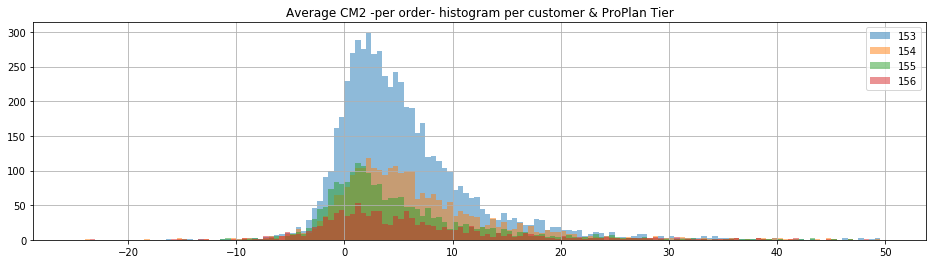

,Tier 153 avg CM2/order,Tier 154 avg CM2/order,Tier 155 avg CM2/order,Tier 156 avg CM2/order
count,5821.00,2613.00,1996.00,1091.00
mean,5.55,6.46,5.01,5.67
std,6.90,8.22,7.68,9.03
min,-31.74,-42.82,-14.93,-65.94
25%,1.37,1.65,0.42,0.26
50%,4.04,4.85,2.96,3.73
75%,7.87,9.19,7.49,8.95
max,83.85,90.25,81.14,70.39


In [67]:
concat_df = pd.DataFrame()

plt.figure(figsize=(16,4))
plt.title('Average CM2 -per order- histogram per customer & ProPlan Tier')

for tq in ztq:
    data_tier = sp_customers[sp_customers['TIER'] == tq]
    data_tier['CM2_AVG'].hist(bins=150, range=(-25, 50), alpha=0.5)
    plt.legend([153, 154, 155, 156])
    concat_df = pd.concat([concat_df,
                           pd.DataFrame(data_tier['CM2_AVG'].describe().round(2)),
                           ], axis=1)
plt.show() 

concat_df.columns = ['Tier 153 avg CM2/order', 'Tier 154 avg CM2/order', 'Tier 155 avg CM2/order', 'Tier 156 avg CM2/order']
display(concat_df) 

Just the same as before, CM2 is not net profit so very low values can become negative at a CM3 or CM4 level...

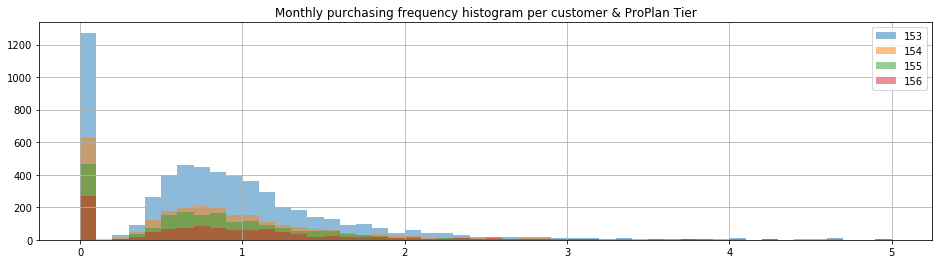

,Tier 153 MPF,Tier 154 MPF,Tier 155 MPF,Tier 156 MPF
count,5821.00,2613.00,1996.00,1091.00
mean,0.93,0.94,0.95,1.06
std,1.40,1.93,1.86,3.41
min,0.00,0.00,0.00,0.00
25%,0.43,0.34,0.39,0.31
50%,0.78,0.76,0.77,0.78
75%,1.18,1.17,1.16,1.20
max,60.00,60.00,60.00,90.00


In [68]:
concat_df = pd.DataFrame()

plt.figure(figsize=(16,4))
plt.title('Monthly purchasing frequency histogram per customer & ProPlan Tier')

for tq in ztq:
    data_tier = sp_customers[sp_customers['TIER'] == tq]
    data_tier['PUR_FREQ_MON'].hist(bins=50, range=(0, 5), alpha=0.5)
    plt.legend([153, 154, 155, 156])
    concat_df = pd.concat([concat_df,
                           pd.DataFrame(data_tier['PUR_FREQ_MON'].describe().round(2)),
                           ], axis=1)
plt.show() 

concat_df.columns = ['Tier 153 MPF', 'Tier 154 MPF', 'Tier 155 MPF', 'Tier 156 MPF']
display(concat_df)

Frequencies have been computed as follows:
    - Difference in days between first and last order within the dataset
    - Days divided by 30, approximation to months
    - Number of purchases within the dataset divided by number of months obtained

Median values per Tier stay close around 0.77, meaning one purchase each 39 days. But values are so spread, see how standard deviation are greater than the mean and even more in the case of the long term tiers (154, 156). We can see that:

- Long term tiers generally have bigger average basket value. Altough this basket value cannot compensate the high discount made  and CM2% is quite low.
- It does not imply more purchases per unit of time.

Higher discounts must be linked to more purchases per time unit. Otherwise, as we have seen, even if basket value is greater we are not earning more money in terms of CM2 at all.

In [69]:
sp_cus_sd = sp_customers[sp_customers['SP_SD'] < '2018-01-01']

In [70]:
sp_cus_sd['CUSTOMER_ID'].nunique()

8046

In [71]:
sp_customers['CUSTOMER_ID'].nunique()

11521

In [72]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [73]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')')

In [74]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [75]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [76]:
pg3['PG_SHORTLINK_ID'] = pg3['PG_SHORTLINK'] + '_' + pg3['PG_ID'].astype(str)

In [77]:
len(set(pg3['PG_ID'])), len(set(pg3['PG_SHORTLINK_ID']))

(56, 56)

In [78]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK_ID'])}

In [79]:
pg3_dict[0] = 'null'

In [80]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [81]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(268243, 268243)

In [82]:
data['LEAD_PG3_NAME'] = lista_pg3

In [83]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [84]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')')

In [85]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [86]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [87]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [88]:
pg4_dict[-1] = 'null'

In [89]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [90]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(268243, 268243)

In [91]:
data['LEAD_PG4_NAME'] = lista_pg4

In [92]:
data[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME']].sample(5)

,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME
58837,252,katzenfutter_trockenfutter_252,286,pro_plan
214624,251,hundefutter_trockenfutter_251,283,pro_plan
14351,252,katzenfutter_trockenfutter_252,261925,royal_canin_breed_cat
125091,251,hundefutter_trockenfutter_251,47690,purina_veterinary_diets
111294,252,katzenfutter_trockenfutter_252,2126,almo_nature_holistic


In [93]:
orders = data.groupby(['SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE', 'CUS_N_KEY_CUSTOMER', 'CZP_ZTQ_ID',
                       'OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME'], 
                      as_index=False).agg({'SCM_D_FINANCE_CM2': 'sum',
                                           'OSP_KO_COUNT_NET': 'mean',
                                           'REL_CM2': 'sum',
                                           'SCM_D_ORIG_FINANCE_ORDER_NET':'sum'})

In [94]:
orders_per_pg4 = orders.groupby('LEAD_PG4_NAME')['SCM_N_ORDER_NR'].nunique()
perc_cm2_per_pg4 = orders.groupby('LEAD_PG4_NAME')['REL_CM2'].mean()
abs_cm2_per_pg4 = orders.groupby('LEAD_PG4_NAME')['SCM_D_FINANCE_CM2'].sum()

#### Unprofitable brands

In [95]:
pg4_ord = pd.DataFrame(orders_per_pg4)
pg4_cm2_perc = pd.DataFrame(perc_cm2_per_pg4)
pg4_cm2_abs = pd.DataFrame(abs_cm2_per_pg4)


pg4_df = pd.concat([pg4_ord, pg4_cm2_perc, pg4_cm2_abs], axis=1)

pg4_df.sort_values(by='SCM_D_FINANCE_CM2').head(25).round(2)

,SCM_N_ORDER_NR,REL_CM2,SCM_D_FINANCE_CM2
LEAD_PG4_NAME,,,
halsband,258,-7.80,-650.02
spoton,314,-4.90,-382.84
affinity_ultima,59,-6.79,-73.07
spray,12,-4.48,-13.49
whiskas,9,-1.92,-11.07
friskies,17,-3.11,-5.98
spielmaeuse,1,-227.12,-4.49
napfunterlagen,1,-246.00,-3.87
welpenfutter,3,-1.13,-3.73


In [96]:
neg_brands = pg4_df.sort_values(by='SCM_D_FINANCE_CM2').head(20).index.values
neg_brands

array(['halsband', 'spoton', 'affinity_ultima', 'spray', 'whiskas',
       'friskies', 'spielmaeuse', 'napfunterlagen', 'welpenfutter',
       'traenken', 'aquarium_unterschrank', 'stroh', 'true_instinct_nass',
       'feringa_snacks', 'fernhaltespray',
       'fernhaltemittel_geruchsentferner', 'brekkies', 'dreamies_snack',
       'mischungen', 'brekkies_katzenfutter'], dtype=object)

#### TOP sellers in ProPlan SP tiers

In [97]:
pg4_df.sort_values(by='SCM_N_ORDER_NR', ascending=False).head(50).round(2)

,SCM_N_ORDER_NR,REL_CM2,SCM_D_FINANCE_CM2
LEAD_PG4_NAME,,,
pro_plan,19350,2.42,45794.82
royal_canin,2453,6.31,12360.50
hills_prescription_diet,1900,8.23,13503.57
royal_canin_veterinary_diet,1731,6.16,9603.36
royal_canin_size,1638,3.79,5917.94
hills,1447,6.43,7904.06
tigerino,1034,11.40,5584.65
purizon,1033,19.47,16002.34
almo_nature,965,9.99,7716.83


In [98]:
top_sellers_25 = pg4_df.sort_values(by='SCM_N_ORDER_NR', ascending=False).head(25).index.values
top_sellers_25

array(['pro_plan', 'royal_canin', 'hills_prescription_diet',
       'royal_canin_veterinary_diet', 'royal_canin_size', 'hills',
       'tigerino', 'purizon', 'almo_nature',
       'hundefutter_wolf_of_wilderness', 'royal_canin_katzenfutter',
       'felix', 'royal_canin_breed', 'eukanuba', 'gourmet', 'orijen',
       'royal_canin_breed_cat', 'cats_best',
       'royal_canin_vet_care_nutrition', 'taste_of_the_wild', 'acana',
       'nutrivet', 'bosch', 'cosma', 'spoton'], dtype=object)

#### Potential brands for pushing due to high CM2%

In [99]:
pg4_df.sort_values(by='REL_CM2', ascending=False).head(25).round(2).sort_values(by='SCM_N_ORDER_NR', ascending=False)

,SCM_N_ORDER_NR,REL_CM2,SCM_D_FINANCE_CM2
LEAD_PG4_NAME,,,
hundefutter_wolf_of_wilderness,739,31.36,18767.99
concept_for_life_dog,214,32.90,4340.10
concept_for_life_cat,212,31.42,3935.19
concept_for_life_katzennassnahrung,58,31.74,889.51
wild_freedom,47,28.20,916.94
hundemantel,18,37.00,303.91
hundeschuhe,10,31.81,82.01
baelle,9,28.37,135.40
purina,4,32.09,41.77


In [100]:
potential_brands = pg4_df.sort_values(by='REL_CM2', ascending=False).head(25).round(2).sort_values(by='SCM_N_ORDER_NR', ascending=False).head(5).index.values
potential_brands

array(['hundefutter_wolf_of_wilderness', 'concept_for_life_dog',
       'concept_for_life_cat', 'concept_for_life_katzennassnahrung',
       'wild_freedom'], dtype=object)

#### Let's see these three different aspects (negative brands, top sellers, potential brands) per Tier

In [101]:
pg4_metrics_per_tier = pd.pivot_table(orders,
              index = ['LEAD_PG4_NAME', 'CZP_ZTQ_ID'], values = ['SCM_N_ORDER_NR', 'REL_CM2', 'SCM_D_FINANCE_CM2'],
              aggfunc= {'SCM_N_ORDER_NR': len, 
                        'REL_CM2': np.mean, 
                        'SCM_D_FINANCE_CM2': np.sum}).round(2).unstack('CZP_ZTQ_ID')

In [102]:
pg4_metrics_per_tier.loc[neg_brands].fillna('-')

REL_CM2                      \
CZP_ZTQ_ID                           153    154    155   156   
LEAD_PG4_NAME                                                  
halsband                           -7.35  -7.65  -8.91 -8.81   
spoton                                -4  -6.46  -5.25  -5.7   
affinity_ultima                    -7.19  -7.95   2.84 -4.93   
spray                              -5.53   1.94 -13.53  1.15   
whiskas                             5.43  -1.89 -11.73     -   
friskies                           -3.04  -3.26      - -2.61   
spielmaeuse                      -227.12      -      -     -   
napfunterlagen                      -246      -      -     -   
welpenfutter                       -7.32  11.24      -     -   
traenken                          -78.68      -      -     -   
aquarium_unterschrank              -7.05      -      -     -   
stroh                                  -  -4.98   5.53     -   
true_instinct_nass                 -6.43      -      -     -   
feringa_snacks                         -      -      - -7.06   
fernhaltespray                         -  -4.04      -     -   
fernhaltemittel_geruchsentferner       -      -   -9.4     -   
brekkies                               -      -  -0.65     -   
dreamies_snack                     -0.45      -      -     -   
mischungen                          0.56      -      -     -   
brekkies_katzenfutter              -1.92   0.04   1.62     -   

                                 SCM_D_FINANCE_CM2                        \
CZP_ZTQ_ID                                     153     154    155    156   
LEAD_PG4_NAME                                                              
halsband                                   -257.73 -167.22 -134.2 -90.87   
spoton                                     -123.94 -130.22 -81.96 -46.72   
affinity_ultima                             -48.14  -18.78   0.89  -7.05   
spray                                        -7.76    2.99  -9.29   0.57   
whiskas                                        6.5   -9.24  -8.33      -   
friskies                                       1.4    -6.4      -  -0.98   
spielmaeuse                                  -4.49       -      -      -   
napfunterlagen                               -3.87       -      -      -   
welpenfutter                                 -7.04    3.31      -      -   
traenken                                     -3.11       -      -      -   
aquarium_unterschrank                        -3.01       -      -      -   
stroh                                            -   -3.39   1.06      -   
true_instinct_nass                           -2.24       -      -      -   
feringa_snacks                                   -       -      -  -2.15   
fernhaltespray                                   -   -1.55      -      -   
fernhaltemittel_geruchsentferner                 -       -  -1.46      -   
brekkies                                         -       -  -0.73      -   
dreamies_snack                                -0.2       -      -      -   
mischungen                                    0.11       -      -      -   
brekkies_katzenfutter                        -0.74    0.29   0.75      -   

                                 SCM_N_ORDER_NR              
CZP_ZTQ_ID                                  153 154 155 156  
LEAD_PG4_NAME                                                
halsband                                    134  60  43  21  
spoton                                      163  67  53  31  
affinity_ultima                              30  19   2   8  
spray                                         4   4   3   1  
whiskas                                       4   2   3   -  
friskies                                      9   7   -   1  
spielmaeuse                                   1   -   -   -  
napfunterlagen                                1   -   -   -  
welpenfutter                                  2   1   -   -  
traenken                                      1   -   -   -  
aquar

In [103]:
pg4_metrics_per_tier.loc[top_sellers_25]

REL_CM2                      SCM_D_FINANCE_CM2  \
CZP_ZTQ_ID                         153    154    155    156               153   
LEAD_PG4_NAME                                                                   
pro_plan                          2.99   2.95   1.01   0.92          25278.18   
royal_canin                       6.67   7.09   5.05   4.37           6834.70   
hills_prescription_diet           8.58   8.65   7.03   6.88           6832.39   
royal_canin_veterinary_diet       6.45   5.95   5.87   5.36           4843.85   
royal_canin_size                  4.27   4.18   0.97   3.11           3508.64   
hills                             6.47   7.14   5.14   6.40           3385.72   
tigerino                         11.52  12.03  10.96   9.82           2777.89   
purizon                          18.99  21.61  18.15  19.25           8450.73   
almo_nature                       9.76  11.94   9.36   8.83           4459.44   
hundefutter_wolf_of_wilderness   31.52  30.98  31.13  32.11           8401.74   
royal_canin_katzenfutter         10.29  11.44   8.56   9.74           2468.12   
felix                             0.40   0.58   1.98   1.48            361.62   
royal_canin_breed                 9.06   6.57   4.46   7.21           2274.27   
eukanuba                          7.32   8.21   4.73   6.62           1097.97   
gourmet                           4.56   6.59   5.36   2.14           1282.13   
orijen                           17.21  17.28  15.50  16.76           3930.00   
royal_canin_breed_cat             8.20   7.72   7.35   7.09           1018.07   
cats_best                         4.92   6.79   6.50   4.05            558.15   
royal_canin_vet_care_nutrition    6.76   6.74   5.56   5.69            860.39   
taste_of_the_wild                16.56  16.77  15.05  14.44           2751.01   
acana                            16.17  13.30  16.05  13.22           2208.07   
nutrivet                         18.82  19.84  19.68  18.49           2375.34   
bosch                            14.82  14.89  12.43  15.74           1604.75   
cosma                            14.45  14.18  13.44  12.27           1750.19   
spoton                           -4.00  -6.46  -5.25  -5.70           -123.94   

                                                           SCM_N_ORDER_NR  \
CZP_ZTQ_ID                           154      155      156            153   
LEAD_PG4_NAME                                                               
pro_plan                        13037.88  4451.91  3026.85         9557.0   
royal_canin                      3081.51  1465.02   979.26         1355.0   
hills_prescription_diet          3401.23  2177.47  1092.48         1025.0   
royal_canin_veterinary_diet      2269.72  1781.49   708.30          901.0   
royal_canin_size                 1778.04   189.17   442.08          939.0   
hills                            2572.46  1010.21   935.67          687.0   
tigerino                         1575.20   600.90   630.65          511.0   
purizon                          4041.01  2415.99  1094.61          578.0   
almo_nature                      1439.20  1208.73   609.46          644.0   
hundefutter_wolf_of_wilderness   5010.81  3549.53  1805.90          333.0   
royal_canin_katzenfutter         1566.67   712.63   457.06          365.0   
felix                             197.59   240.89   327.35          315.0   
royal_canin_breed                 845.61   337.89   301.08          311.0   
eukanuba                          754.23   431.60   306.32          229.0   
gourmet                           924.70   153.82   180.09          298.0   
orijen                           2077.15  1059.59   895.15          252.0   
royal_canin_breed_cat             512.68   292.71   352.81          197.0   
cats_best                         340.49   179.68    81.39          223.0   
royal_canin_vet_care_nutrition    820.83   276.49   257.03          180.0   
taste_of_the_wild                1159.04   598.17   406.15          

In [104]:
pg4_metrics_per_tier.loc[potential_brands]

REL_CM2                       \
CZP_ZTQ_ID                             153    154    155    156   
LEAD_PG4_NAME                                                     
hundefutter_wolf_of_wilderness       31.52  30.98  31.13  32.11   
concept_for_life_dog                 33.18  31.76  34.66  30.67   
concept_for_life_cat                 31.47  32.78  30.66  30.58   
concept_for_life_katzennassnahrung   32.85  28.63  28.72  30.03   
wild_freedom                         27.14  23.41  37.68  26.82   

                                   SCM_D_FINANCE_CM2                    \
CZP_ZTQ_ID                                       153      154      155   
LEAD_PG4_NAME                                                            
hundefutter_wolf_of_wilderness               8401.74  5010.81  3549.53   
concept_for_life_dog                         2368.12   709.86   791.54   
concept_for_life_cat                         1935.56   654.44  1120.47   
concept_for_life_katzennassnahrung            621.29   172.41    57.45   
wild_freedom                                  432.70   180.43   226.78   

                                            SCM_N_ORDER_NR                      
CZP_ZTQ_ID                              156            153    154    155   156  
LEAD_PG4_NAME                                                                   
hundefutter_wolf_of_wilderness      1805.90          333.0  201.0  133.0  72.0  
concept_for_life_dog                 470.59          119.0   36.0   35.0  24.0  
concept_for_life_cat                 224.72          110.0   34.0   57.0  11.0  
concept_for_life_katzennassnahrung    38.35           42.0   10.0    4.0   2.0  
wild_freedom                          77.04           27.0    9.0    8.0   3.0

In [ ]:
# From those not repurchasing (means only one order placed within their SP in our 1-year time window) 
# let's see the percentage of them having already amortized the discount in the first order...

In [105]:
# Let's collect the customer IDs and get the order positions back
sp_cus_1_ord = sp_customers[sp_customers['ORDERS'] == 1]['CUSTOMER_ID']

In [106]:
sp1 = data[data['CUS_N_KEY_CUSTOMER'].isin(sp_cus_1_ord)]

In [131]:
# Total orders
sp1['SCM_N_ORDER_NR'].nunique()

2611

In [107]:
# 1118 out of 2611 orders starting the SP at the moment of purchasing this 'first' order
sp1[sp1['TDT_T_KEY_ORDER_DATE'] == sp1['CZP_START_DATE']]['SCM_N_ORDER_NR'].nunique()

1118

In [111]:
sp1[(sp1['TDT_T_KEY_ORDER_DATE'] == sp1['CZP_START_DATE']) & (sp1['SCM_MASTER_AP_ID'] == 42715)]['SCM_N_ORDER_NR'].nunique()

1107

In [136]:
# 1107 out of 1118 are applying the discount...let's see the others why are not
lis = [i for i in sp1[sp1['TDT_T_KEY_ORDER_DATE'] == sp1['CZP_START_DATE']]['SCM_N_ORDER_NR'].unique() if i not in orders['SCM_N_ORDER_NR'].unique()]

In [137]:
lis

[110363010,
 110712103,
 110481477,
 111364538,
 111037647,
 110506829,
 110309147,
 111357601,
 110046113,
 109795044,
 110916756]

In [144]:
# Seems to be coupons (SCM_MASTER_AP_ID = 6169) involved and not compatible anymore with SP discount
data[data['SCM_N_ORDER_NR'].isin(lis[8:])][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
246497,468724196,110046113,2018-05-05,00:46,4,9309831,77.99,0.0,18.5517,10.5290,64.9917,73064,2108112,73064,1,L,0,F,324,6
246498,468724195,110046113,2018-05-05,00:46,4,9309831,9.99,0.0,8.3250,8.3250,8.3250,42225,2128236,42225,1,L,0,F,6,0
246544,467732955,109795044,2018-05-01,13:48,4,4860838,-2.29,0.0,-1.9083,-1.9083,-1.9083,0,1,6169,1,L,0,F,0,0
246545,467732956,109795044,2018-05-01,13:48,4,4860838,49.99,0.0,9.5883,1.8765,41.6583,67692,1741353,67692,1,L,0,F,324,2
246546,467732956,109795044,2018-05-01,13:48,4,4860838,49.99,0.0,9.5883,1.8765,41.6583,67692,1741353,67692,1,L,0,F,324,2
246547,467732958,109795044,2018-05-01,13:48,4,4860838,9.99,0.0,8.3250,8.3250,8.3250,42225,2128236,42225,1,L,0,F,6,0
246548,467732957,109795044,2018-05-01,13:48,4,4860838,4.49,0.0,1.1617,0.6338,3.7417,48245,748752,48245,1,L,0,F,324,2
246549,467732959,109795044,2018-05-01,13:48,4,4860838,0.00,0.0,-0.4900,-0.8338,0.0000,78707,2403951,78707,1,L,0,F,324,2
246669,472191234,110916756,2018-05-18,10:30,4,2383274,0.00,0.0,-0.4100,-0.9045,0.0000,7883,468222,7883,1,L,0,F,327,2
246670,472191230,110916756,2018-05-18,10:30,4,2383274,7.99,0.0,2.0583,1.2645,6.6583,32418,626724,32418,1,L,0,F,327,2


In [114]:
orders = sp1[(sp1['TDT_T_KEY_ORDER_DATE'] == sp1['CZP_START_DATE']) & (sp1['SCM_MASTER_AP_ID'] == 42715)]

In [117]:
dict_ord_disc_gt_sp = {}
for i in orders['SCM_N_ORDER_NR'].unique():
    order = orders[orders['SCM_N_ORDER_NR'] == i]
    disc = abs(order[order['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'])
    sp_price = order[order['SCM_MASTER_AP_ID'] == 42715]['CZP_PRICE']
    if float(disc) >= float(sp_price):
        dict_ord_disc_gt_sp[i] = 1
    else:
        dict_ord_disc_gt_sp[i] = 0

In [127]:
res = [i for i in dict_ord_disc_gt_sp.values()]

In [130]:
sum(res) / orders['SCM_N_ORDER_NR'].nunique() * 100

52.75519421860885

In [ ]:
# Almost 53% of the customers not repurchasing have already amortized the SP price with the SP discount 
# applied in their unique order

In [147]:
lis2 = [i for i in sp1[sp1['TDT_T_KEY_ORDER_DATE'] == sp1['CZP_START_DATE']]['SCM_N_ORDER_NR'].unique() 
        if i not in sp1[(sp1['TDT_T_KEY_ORDER_DATE'] == sp1['CZP_START_DATE']) & (sp1['SCM_MASTER_AP_ID'] == 42225)]['SCM_N_ORDER_NR'].unique()]

In [153]:
sp1[(sp1['TDT_T_KEY_ORDER_DATE'] == sp1['CZP_START_DATE']) & (sp1['SCM_MASTER_AP_ID'] == 42225)]['SCM_N_ORDER_NR'].nunique()

1023

In [152]:
len(lis2)

95

In [160]:
data[data['SCM_N_ORDER_NR'].isin(lis2)].tail(25)

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,OP_BONUSPOINTS,BP_TYP,ORDER_DATETIME,WEEK_NUMBER,MONTH_NUMBER,FINANCE_ORDER_NET,REL_CM1,REL_CM2,LEAD_PG3_NAME,LEAD_PG4_NAME
248675,459392154,107717119,2018-03-30,14:07,4,4766632,-4.060,0.0,-3.3833,-3.3833,...,0,NaN,2018-03-30 14:07:00,13,3,44.9417,-7.528198,-7.528198,katzenfutter_trockenfutter_252,royal_canin
252028,446013293,104576290,2018-02-13,12:16,4,4059274,49.990,0.0,9.4083,2.0230,...,0,NaN,2018-02-13 12:16:00,7,2,55.7750,16.868310,3.627073,hundefutter_trockenfutter_251,pro_plan
252029,446013294,104576290,2018-02-13,12:16,4,4059274,12.990,0.0,4.1250,3.5916,...,0,NaN,2018-02-13 12:16:00,7,2,55.7750,7.395787,6.439444,hundefutter_trockenfutter_251,pro_plan
252030,446013295,104576290,2018-02-13,12:16,4,4059274,-5.040,0.0,-4.2000,-4.2000,...,0,NaN,2018-02-13 12:16:00,7,2,55.7750,-7.530255,-7.530255,hundefutter_trockenfutter_251,pro_plan
252031,446013292,104576290,2018-02-13,12:16,4,4059274,8.990,0.0,3.3917,1.0201,...,0,NaN,2018-02-13 12:16:00,7,2,55.7750,6.081040,1.828956,hundefutter_trockenfutter_251,pro_plan
254415,392665096,91966678,2017-08-04,12:54,4,11531525,19.990,0.0,4.8983,3.9745,...,0,NaN,2017-08-04 12:54:00,31,8,171.9583,2.848539,2.311316,katzenfutter_dose_2068,miamor
254416,392665100,91966678,2017-08-04,12:54,4,11531525,18.990,0.0,4.3450,3.4752,...,0,NaN,2017-08-04 12:54:00,31,8,171.9583,2.526775,2.020955,katzenfutter_dose_2068,miamor
254417,392665099,91966678,2017-08-04,12:54,4,11531525,8.495,0.0,5.1992,4.4797,...,0,NaN,2017-08-04 12:54:00,31,8,171.9583,3.023524,2.605108,katzenfutter_dose_2068,miamor
254418,392665099,91966678,2017-08-04,12:54,4,11531525,8.495,0.0,5.1992,4.4797,...,0,NaN,2017-08-04 12:54:00,31,8,171.9583,3.023524,2.605108,katzenfutter_dose_2068,miamor
254419,392665095,91966678,2017-08-04,12:54,4,11531525,18.990,0.0,4.4450,3.5752,...,0,NaN,2017-08-04 12:54:00,31,8,171.9583,2.584929,2.079109,katzenfutter_dose_2068,miamor


In [ ]:
# Those orders are related with a SP bought in a previous order during the same day 
# that has been cancelled after - sp discount still applying for some time -